<a href="https://colab.research.google.com/github/Poojakjain25/CVIP_DATA_SCIENCE/blob/main/Breast_Cancer_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

PROJECT NAME : Breast Cancer Prediction

AIM : The aim of the project is to classify whether the breast tumor is malignant(cancerous) or benign(non-cancerous).

WORKING : We use machine learning in order to classify the tumor. The area that has lump or is suspicious undergoes Fine-Needle Aspiration(FNA) technique. The FNA technique involves using a thin needle to extract a sample of cells from the lump. This sample is then sent for pathology examination where in cell nucleus characteristics from tissue samples are determined to classify the type of tumor as malignant or benign.



In [2]:
# IMPORT STATEMENTS
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
import numpy as np

Reading the breast cancer csv file.

In [3]:
breast_cancer_data = pd.read_csv("/content/breast-cancer.csv")

Determining the number of rows and columns in the given dataset using shape function.

In [4]:
print(breast_cancer_data.shape)
print("Number of Rows: ",breast_cancer_data.shape[0])
print("Number of Columns: ",breast_cancer_data.shape[1])

(569, 32)
Number of Rows:  569
Number of Columns:  32


The head() function is used to print first 5 rows of the given dataset. Basically used for determining names of the attributes.

In [5]:
breast_cancer_data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


The tail() fucntion is used for printing last 5 rows.

In [6]:
breast_cancer_data.tail()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039


The info() fucntion gives brief description about each of the attribute such as null values, datatype and number of entries.

In [7]:
breast_cancer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [8]:
print("The total number of null values in the entire dataset is: ",breast_cancer_data.isnull().sum().sum())

The total number of null values in the entire dataset is:  0


The describe() function is used for providing summary of only numerical attributes such as mean, count, standard deviation, minimum, maximum, etc.

In [9]:
breast_cancer_data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


array([[<Axes: title={'center': 'id'}>,
        <Axes: title={'center': 'radius_mean'}>,
        <Axes: title={'center': 'texture_mean'}>,
        <Axes: title={'center': 'perimeter_mean'}>,
        <Axes: title={'center': 'area_mean'}>,
        <Axes: title={'center': 'smoothness_mean'}>],
       [<Axes: title={'center': 'compactness_mean'}>,
        <Axes: title={'center': 'concavity_mean'}>,
        <Axes: title={'center': 'concave points_mean'}>,
        <Axes: title={'center': 'symmetry_mean'}>,
        <Axes: title={'center': 'fractal_dimension_mean'}>,
        <Axes: title={'center': 'radius_se'}>],
       [<Axes: title={'center': 'texture_se'}>,
        <Axes: title={'center': 'perimeter_se'}>,
        <Axes: title={'center': 'area_se'}>,
        <Axes: title={'center': 'smoothness_se'}>,
        <Axes: title={'center': 'compactness_se'}>,
        <Axes: title={'center': 'concavity_se'}>],
       [<Axes: title={'center': 'concave points_se'}>,
        <Axes: title={'center': 's

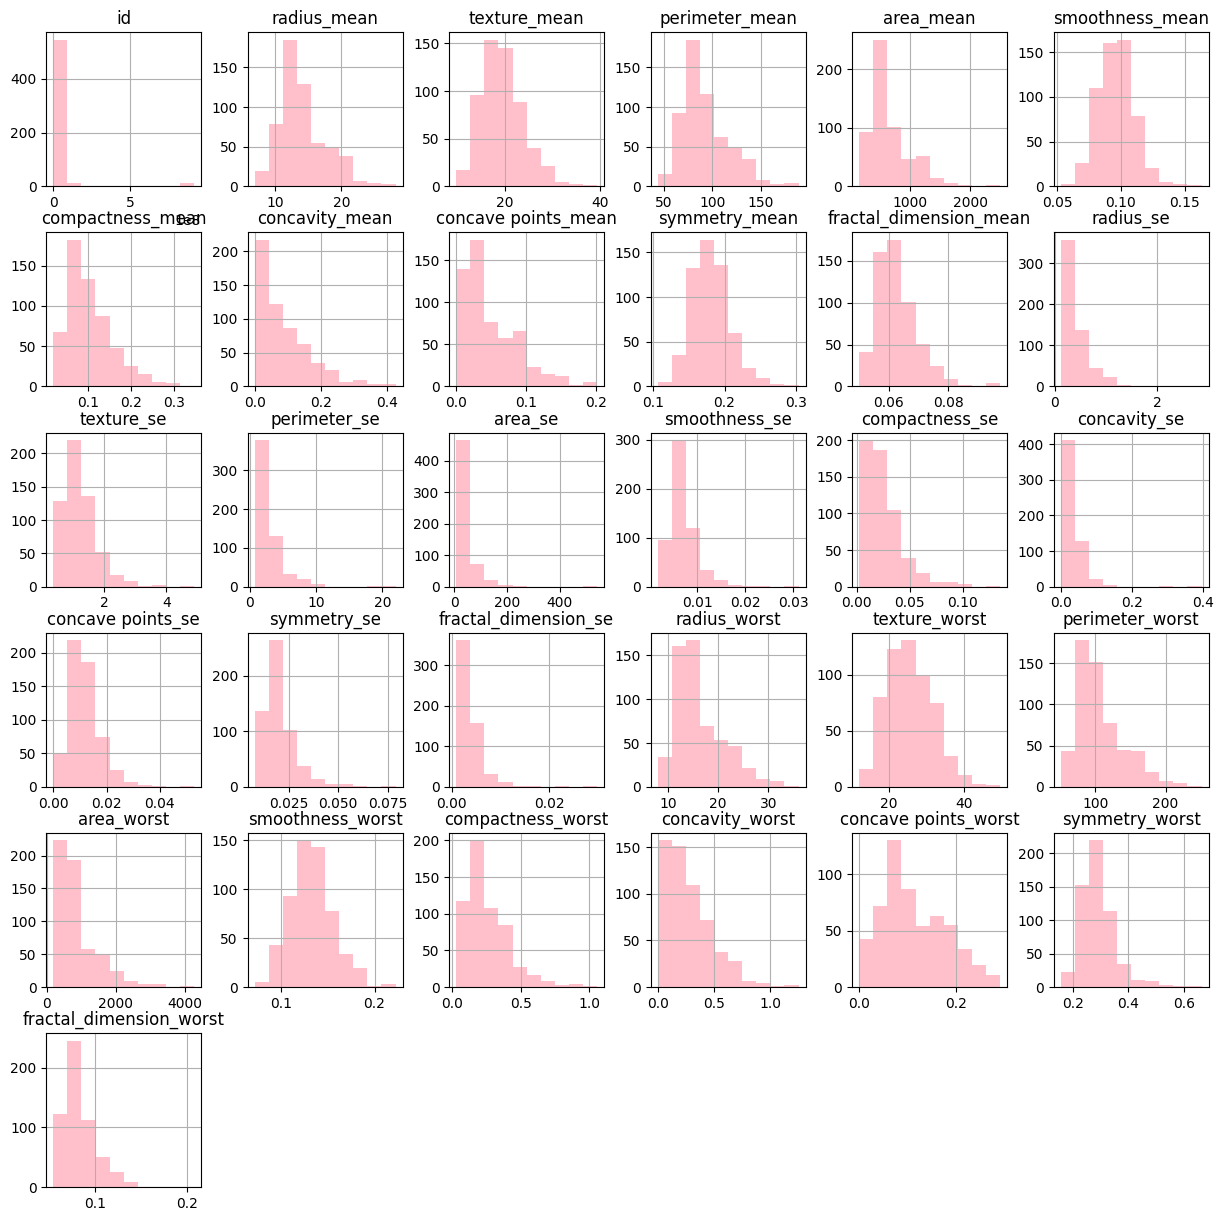

In [10]:
breast_cancer_data.hist(figsize = (15,15), color = "pink")

Using value_counts() method to determine the total number of each of the target variable counts.

In [11]:
breast_cancer_data["diagnosis"].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

Using mean method to get mean of all attributes under each of the target variables. This will help us in determining the relation and the difference of the values between the target variables.

In [12]:
breast_cancer_data.groupby('diagnosis').mean()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,,,,,,,,,,,,,,,,,,,,,
B,2.654382e+07,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,...,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442
M,3.681805e+07,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,...,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530


Converting 'diagnosis' attribute from object type to numeric type so that building a model becomes easier.

Here 0 --> Benign and 1 --> Malignant

In [13]:
breast_cancer_data['diagnosis'] = breast_cancer_data['diagnosis'].map({"B":0, "M":1})

Using the head() function to check if all the 'diagnosis' attribute are converted from object type to numeric type.

In [14]:
breast_cancer_data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Splitting up the dataset into x and y

In [15]:
x = breast_cancer_data.iloc[:,2:]
y = breast_cancer_data["diagnosis"]

Checking if x has relevant attributes.

In [16]:
x.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Checking if y has relevant attributes.

In [17]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: diagnosis, dtype: int64

Splitting x and y into train and test set, with 20% of data in test set.

In [18]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

Determining the Pearsons correlation coefficient between each of the attributes and plotting a heatmap for better visualization.

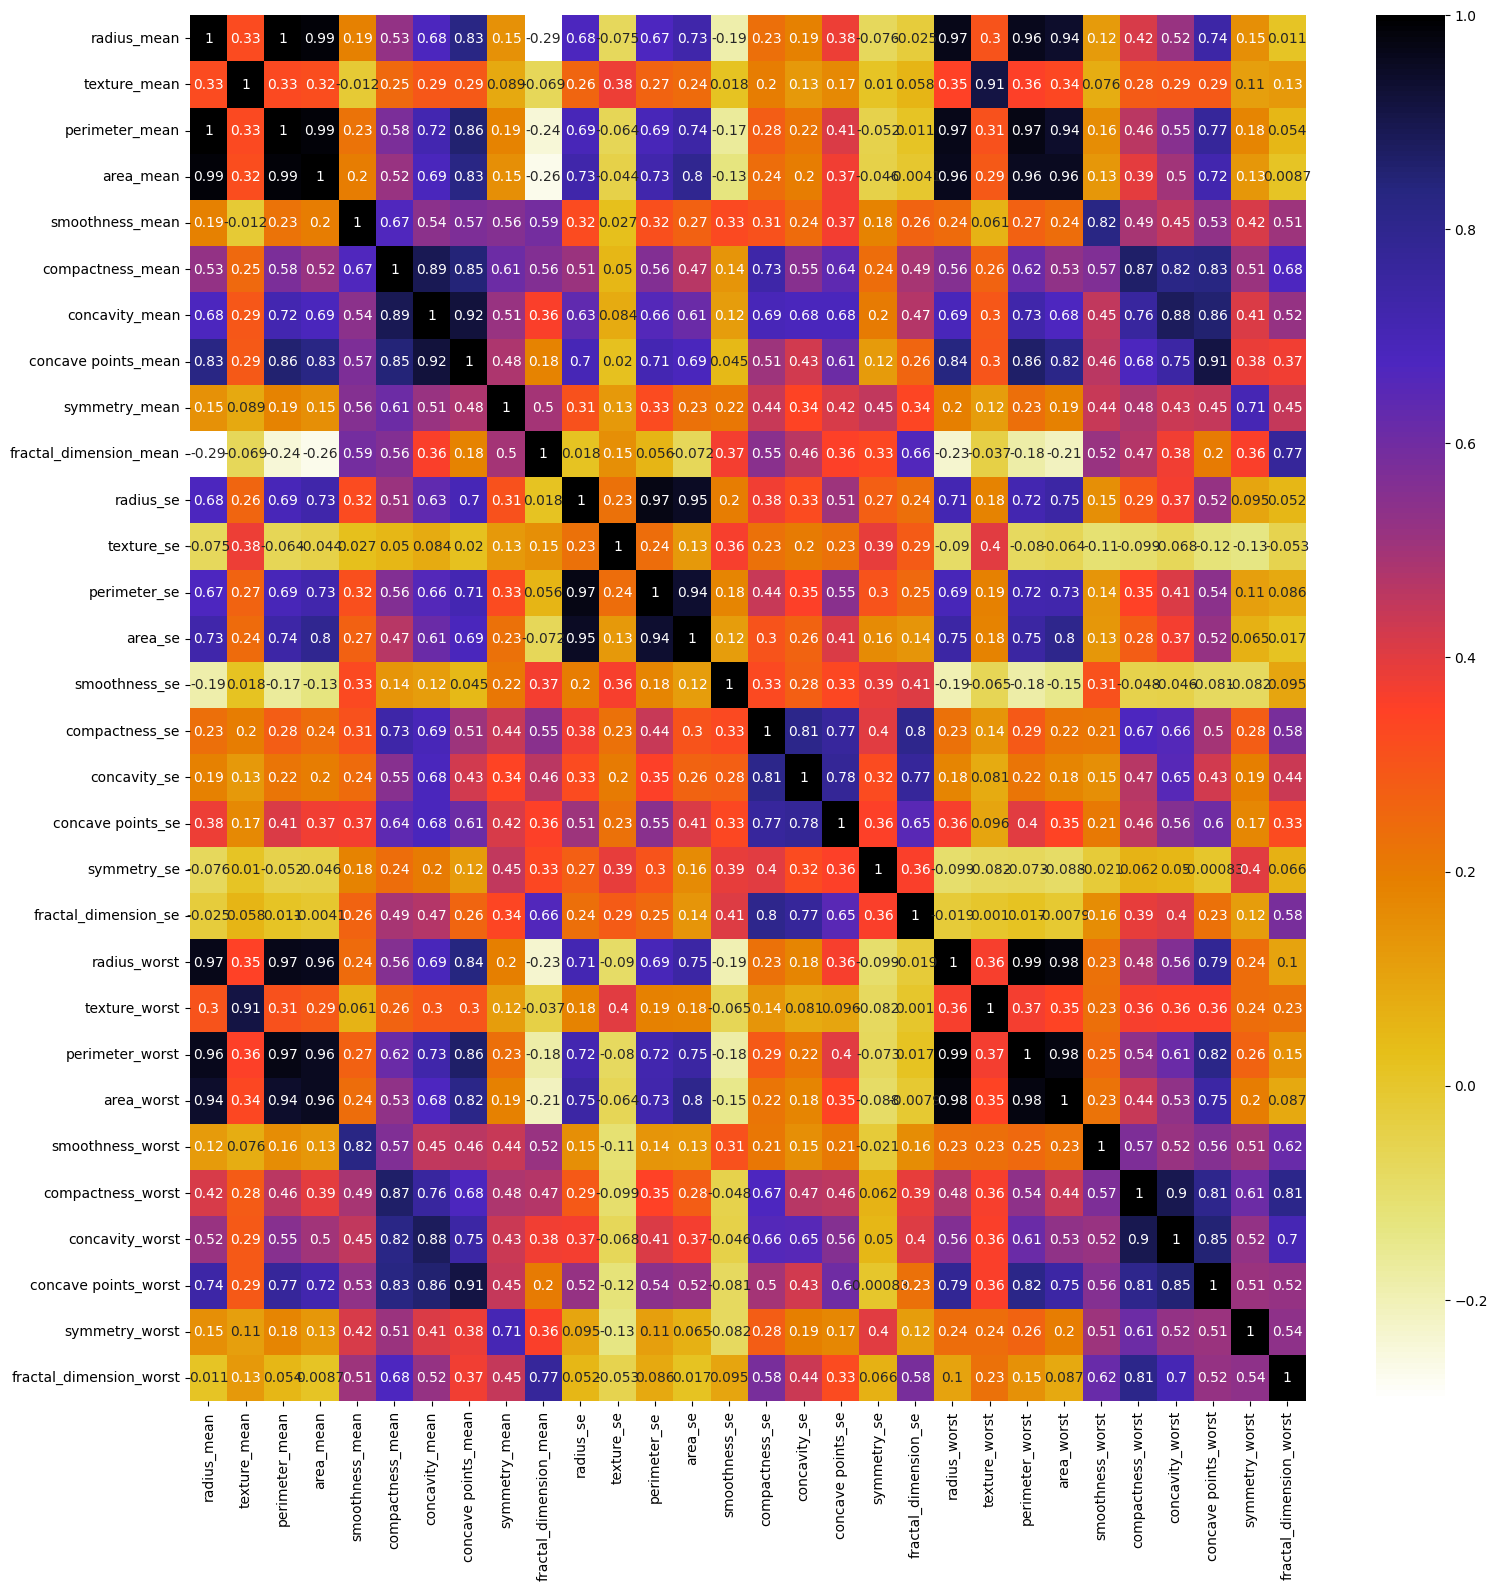

In [19]:
import seaborn as sns
plt.figure(figsize = (18,18))
corr = x_train.corr(numeric_only=True)
sns.heatmap(corr, annot = True, cmap = plt.cm.CMRmap_r)
plt.show()

Writing a function called correlation with inputs as dataset and threshold. This function will determine correlation between each of the attributes and any correlation between attribute found greater then threshold will be added to col_corr set and returned.

In [20]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

Setting threshold to 0.9. If the correlation between any attributes is found to be greater than 90 if will be added in col_corr set and returned.

In [21]:
corr_features = correlation(x_train, 0.9)

In [22]:
corr_features

{'area_mean',
 'area_se',
 'area_worst',
 'concave points_mean',
 'concave points_worst',
 'perimeter_mean',
 'perimeter_se',
 'perimeter_worst',
 'radius_worst',
 'texture_worst'}

In [23]:
len(corr_features)

10

In [24]:
x_train_dropped = x_train.drop(corr_features,axis=1)
x_train_dropped

,radius_mean,texture_mean,smoothness_mean,compactness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,smoothness_worst,compactness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst
10,16.02,23.24,0.08206,0.06669,0.03299,0.1528,0.05697,0.3795,1.1870,0.004029,0.009269,0.011010,0.007591,0.01460,0.003042,0.11810,0.15510,0.14590,0.2948,0.08452
170,12.32,12.39,0.10280,0.06981,0.03987,0.1959,0.05955,0.2360,0.6656,0.008045,0.011800,0.016830,0.012410,0.01924,0.002248,0.13850,0.12660,0.12420,0.2827,0.06771
407,12.85,21.37,0.07551,0.08316,0.06126,0.1580,0.06114,0.4993,1.7980,0.006011,0.044800,0.051750,0.013410,0.02669,0.007731,0.09402,0.19360,0.18380,0.2488,0.08151
430,14.90,22.53,0.09947,0.22250,0.27330,0.2041,0.06898,0.2530,0.8749,0.006965,0.062130,0.079260,0.022340,0.01499,0.005784,0.14190,0.70900,0.90190,0.2866,0.11550
27,18.61,20.25,0.09440,0.10660,0.14900,0.1697,0.05699,0.8529,1.8490,0.010750,0.027220,0.050810,0.019110,0.02293,0.004217,0.13380,0.21170,0.34460,0.2341,0.07421
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37,13.03,18.42,0.08983,0.03766,0.02562,0.1467,0.05863,0.1839,2.3420,0.004352,0.004899,0.013430,0.011640,0.02671,0.001777,0.09701,0.04619,0.04833,0.1987,0.06169
415,11.89,21.17,0.09773,0.08120,0.02555,0.2019,0.06290,0.2747,1.2030,0.009895,0.030530,0.016300,0.009276,0.02258,0.002272,0.14260,0.21870,0.11640,0.3075,0.07351
458,13.00,25.13,0.08369,0.05073,0.01206,0.1667,0.05449,0.2621,1.2320,0.006054,0.008974,0.005681,0.006336,0.01215,0.001514,0.12180,0.10930,0.04462,0.2306,0.06291
476,14.20,20.53,0.08931,0.11080,0.05063,0.1506,0.06009,0.3478,1.0180,0.004107,0.032880,0.028210,0.013500,0.01610,0.002744,0.11530,0.34290,0.25120,0.2534,0.07858


In [25]:
x_test_dropped = x_test.drop(corr_features,axis=1)

In [26]:
x_train_dropped.shape, x_test_dropped.shape

((455, 20), (114, 20))

Model selection

In [27]:
model = LogisticRegression()

In [28]:
model.fit(x_train_dropped.values, y_train.values)

LogisticRegression()

In [29]:
x_training_prediction = model.predict(x_train_dropped.values)
training_acc_score = accuracy_score(y_train, x_training_prediction)

In [30]:
print(training_acc_score)

0.9362637362637363


In [31]:
x_testing_prediction = model.predict(x_test_dropped.values)
testing_acc_score = accuracy_score(y_test.values, x_testing_prediction)
print(testing_acc_score)

0.9298245614035088


In [32]:
model2 = DecisionTreeClassifier()

In [33]:
model2.fit(x_train_dropped, y_train)

DecisionTreeClassifier()

In [34]:
x_training_prediction = model2.predict(x_train_dropped)
training_acc_score = accuracy_score(y_train, x_training_prediction)
print(training_acc_score)

1.0


In [35]:
x_testing_prediction = model2.predict(x_test_dropped)
testing_acc_score = accuracy_score(y_test, x_testing_prediction)
print(testing_acc_score)

0.9298245614035088


The Decision Tree Classifier seems to overfit the data so we choose Logistic Regression Model.

In [36]:
# Predicting the result - Method 1
radius_mean = float(input("Enter the mean radius: "))
texture_mean = float(input("Enter the mean texture: "))
smoothness_mean = float(input("Enter the mean smoothness: "))
compactness_mean = float(input("Enter the mean compactness: "))
concavity_mean = float(input("Enter the mean concavity: "))
symmetry_mean = float(input("Enter the mean symmetry: "))
fractal_dimension_mean = float(input("Enter the mean fractal_dimension: "))
radius_se = float(input("Enter the standard error radius: "))
texture_se = float(input("Enter the standard error texture: "))
smoothness_se = float(input("Enter the standard error smoothness: "))
compactness_se = float(input("Enter the standard error compactness: "))
concavity_se = float(input("Enter the standard error concavity: "))
concave_points_se = float(input("Enter the standard error concave points: "))
symmetry_se = float(input("Enter the standard error symmetry: "))
fractal_dimension_se = float(input("Enter the standard error fractal dimension: "))
smoothness_worst = float(input("Enter the worst smoothness: "))
compactness_worst = float(input("Enter the worst compactness: "))
concavity_worst = float(input("Enter the worst concavity: "))
symmetry_worst = float(input("Enter the worst symmetry: "))
fractal_dimension_worst = float(input("Enter the worst fractal dimension: "))

feature_values = np.array([[
    radius_mean, texture_mean, smoothness_mean, compactness_mean, concavity_mean, symmetry_mean, fractal_dimension_mean,
    radius_se, texture_se, smoothness_se, compactness_se, concavity_se, concave_points_se, symmetry_se, fractal_dimension_se,
    smoothness_worst, compactness_worst, concavity_worst, symmetry_worst, fractal_dimension_worst
]])
prediction = model.predict(feature_values)

if (prediction == 0):
  print('The Breast cancer is Benign')

else:
  print('The Breast Cancer is Malignant')


Enter the mean radius: 18.61
Enter the mean texture: 20.25
Enter the mean smoothness: 0.09440
Enter the mean compactness: 0.10660
Enter the mean concavity: 0.14900
Enter the mean symmetry: 0.1697
Enter the mean fractal_dimension: 0.05699
Enter the standard error radius: 0.08529
Enter the standard error texture: 1.8490
Enter the standard error smoothness: 0.010750
Enter the standard error compactness: 0.027220
Enter the standard error concavity: 0.050810
Enter the standard error concave points: 0.19110
Enter the standard error symmetry: 0.2293
Enter the standard error fractal dimension: 0.004217
Enter the worst smoothness: 0.13380
Enter the worst compactness: 0.21170
Enter the worst concavity: 0.34460
Enter the worst symmetry: 0.2341
Enter the worst fractal dimension: 0.07421
The Breast Cancer is Malignant


In [39]:
# Predicting the result - Method 2
new_values = [[18.61,	20.25,	0.09440,	0.10660,	0.14900,	0.1697,	0.05699,	0.8529,	1.8490,	0.010750,	0.027220,	0.050810,	0.019110,	0.02293,	0.004217,	0.13380,	0.21170,	0.34460,	0.2341,	0.07421]]
prediction = model.predict(new_values)

if (prediction == 0):
  print('The Breast cancer is Benign')

else:
  print('The Breast Cancer is Malignant')

The Breast Cancer is Malignant
